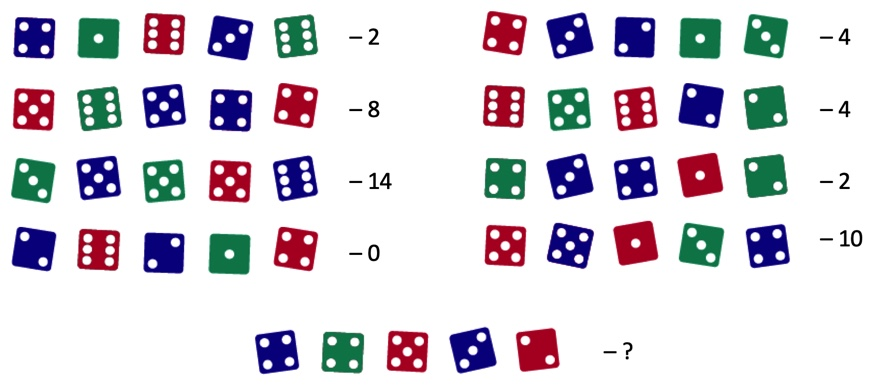

# Подготовка данных

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
df = pd.read_excel('DiceToRose.xlsm')

In [3]:
df.head()

,1,2,3,4,5,result
0,6,5,1,1,5,8
1,1,4,4,2,1,0
2,2,5,4,4,4,4
3,3,6,1,5,5,10
4,6,5,1,5,3,10


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
XTrain, XTest, YTrain, YTest = train_test_split(
    df[[1,2,3,4,5]], df[['result']], test_size=0.33, random_state=42)

In [6]:
XTrain.head()

,1,2,3,4,5
89,6,3,1,2,1
5,2,3,4,2,3
45,3,1,5,6,1
69,3,2,6,6,1
35,3,1,2,4,5


In [7]:
YTrain.head()

,result
89,2
5,4
45,6
69,2
35,6


# Линейная регрессия "в лоб"

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.score(XTest,YTest)

-0.17655101700300846

In [12]:
XTest.head(), lr.predict(XTest)[:5]

(    1  2  3  4  5
 62  3  1  4  1  3
 40  6  6  5  2  6
 95  4  4  6  6  2
 18  2  3  5  6  1
 97  2  1  6  5  5, array([[2.06069531],
        [8.59453801],
        [6.40989732],
        [4.26086012],
        [4.78449905]]))

# Может, нейросеть?

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,5),random_state=41,max_iter=10000)

In [15]:
mlp.fit(XTrain, YTrain.to_numpy().reshape(-1))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=41, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
mlp.score(XTrain, YTrain)

1.0

In [17]:
mlp.score(XTest, YTest.to_numpy().reshape(-1))

0.30303030303030304

In [20]:
pd.concat([XTest , YTest, pd.DataFrame({'predicted result':mlp.predict(XTest)},index=XTest.index)], axis=1 ).head(10)

,1,2,3,4,5,result,predicted result
62,3,1,4,1,3,4,4
40,6,6,5,2,6,4,6
95,4,4,6,6,2,0,2
18,2,3,5,6,1,6,8
97,2,1,6,5,5,8,4
84,5,4,2,4,2,4,4
64,6,4,4,3,4,2,6
42,4,5,1,3,3,8,12
10,6,4,2,6,2,0,4
0,6,5,1,1,5,8,8


# Линейная регрессия + OneHotEncoding

In [21]:
i=1
pd.concat([df[i],pd.get_dummies(df[i],prefix=str(i))],axis=1).head()

,1,1_1,1_2,1_3,1_4,1_5,1_6
0,6,0,0,0,0,0,1
1,1,1,0,0,0,0,0
2,2,0,1,0,0,0,0
3,3,0,0,1,0,0,0
4,6,0,0,0,0,0,1


In [22]:
one_hot_encoded_features=pd.DataFrame()
for i in range(1,6):
    one_hot_encoded_features=pd.concat([one_hot_encoded_features,pd.get_dummies(df[i],prefix=str(i))], axis=1)

In [23]:
one_hot_encoded_features.head()

,1_1,1_2,1_3,1_4,1_5,1_6,2_1,2_2,2_3,2_4,...,4_3,4_4,4_5,4_6,5_1,5_2,5_3,5_4,5_5,5_6
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [24]:
XTrain, XTest, YTrain, YTest = train_test_split(
    one_hot_encoded_features, df[['result']], test_size=0.33, random_state=42)

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.score(XTest,YTest)

1.0

In [35]:
lr.coef_

array([[-0.99994792, -0.99994792,  1.00005208, -0.99994792,  3.00005208,
        -0.99994792, -0.99980026, -0.99980026,  1.00019974, -0.99980026,
         3.00019974, -0.99980026, -1.04047583, -1.04047583,  0.95952417,
        -1.04047583,  2.95952417, -1.04047583, -0.96745683, -0.96745683,
         1.03254317, -0.96745683,  3.03254317, -0.96745683, -1.05556427,
        -1.05556427,  0.94443573, -1.05556427,  2.94443573, -1.05556427]])

In [36]:
import numpy as np

In [37]:
np.round(lr.coef_)

array([[-1., -1.,  1., -1.,  3., -1., -1., -1.,  1., -1.,  3., -1., -1.,
        -1.,  1., -1.,  3., -1., -1., -1.,  1., -1.,  3., -1., -1., -1.,
         1., -1.,  3., -1.]])

In [38]:
lr.intercept_

array([5.06324511])